<a href="https://colab.research.google.com/github/akansha935/Book-Recommender-System/blob/main/book_recommender_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📘 Problem Statement

In today’s digital age, the sheer volume of books available makes it difficult for readers to discover content that aligns with their interests. Traditional search or browsing methods are inefficient and often fail to capture user preferences. A Book Recommender System can help by automatically suggesting books that users are likely to enjoy, based on their past interactions, demographic data, and book metadata.

The goal of this project is to design and implement a recommender system that leverages the Book-Crossing dataset (Books, Ratings, Users) to provide meaningful and personalized recommendations.

🎯 Objectives

Exploratory Data Analysis (EDA)

Understand the distribution of ratings, users, and books.

Identify popular books, active users, and trends in publication years.

Analyze user demographics (age, location).

Data Cleaning & Preprocessing

Handle missing values, duplicates, and anomalies (e.g., invalid years or ages).

Filter out books/users with very few ratings to reduce sparsity.

Develop Recommendation Models

Popularity-Based Recommender: Suggest books with the highest ratings or most interactions.

Collaborative Filtering: Use user-item interactions (matrix factorization or neighborhood models).

Content-Based Filtering: Recommend books similar in title, author, or publisher using NLP techniques.

Hybrid Approach: Combine collaborative and content-based methods for improved accuracy.

Model Evaluation

Assess rating prediction accuracy using RMSE and MAE.

Evaluate top-N recommendation quality using Precision@k, Recall@k, and MAP@k.

Compare the performance of different approaches.

Deployment (Optional)

Create a simple Streamlit or Flask application to demonstrate the recommender system.

Allow users to enter a User-ID or Book Title and receive book recommendations.

Deliverables

A complete EDA report with visualizations.

Cleaned dataset ready for recommendation models.

Implementations of popularity-based, collaborative filtering, content-based, and hybrid recommenders.

Evaluation results and insights.

Final project report and/or interactive web demo.


GITHUB LINK :- https://github.com/akansha935/Book-Recommender-System/blob/main/book_recommender_system.ipynb

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

books = pd.read_csv("Books.csv.zip")
ratings = pd.read_csv("Ratings.csv.zip")
users = pd.read_csv("Users.csv.zip")

print(books.shape, ratings.shape, users.shape)


/tmp/ipython-input-3358761511.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("Books.csv.zip")


(271360, 8) (1149780, 3) (278858, 3)


In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
books.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2
Image-URL-S,0
Image-URL-M,0
Image-URL-L,3


In [ ]:
users.isnull().sum()

,0
User-ID,0
Location,0
Age,110762


In [ ]:
ratings.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0


In [ ]:
books.duplicated().sum()

np.int64(0)

In [ ]:
users.duplicated().sum()

np.int64(0)

In [ ]:
ratings.duplicated().sum()

np.int64(0)

In [ ]:

books.drop_duplicates(inplace=True)
ratings.drop_duplicates(inplace=True)
users.drop_duplicates(inplace=True)
ratings = ratings[ratings['Book-Rating'] > 0]


In [ ]:

popular_books = ratings.groupby('ISBN').count()['Book-Rating'].reset_index()
popular_books = popular_books.merge(books, on='ISBN')
popular_books = popular_books.sort_values('Book-Rating', ascending=False).head(10)

print(popular_books[['Book-Title', 'Book-Author']])


                                               Book-Title      Book-Author
21945                           The Lovely Bones: A Novel     Alice Sebold
117745                                        Wild Animus     Rich Shapero
38819                                   The Da Vinci Code        Dan Brown
18058                 The Red Tent (Bestselling Backlist)    Anita Diamant
4131      Divine Secrets of the Ya-Ya Sisterhood: A Novel    Rebecca Wells
68898   Harry Potter and the Sorcerer's Stone (Harry P...    J. K. Rowling
12325                             The Secret Life of Bees    Sue Monk Kidd
51799   Where the Heart Is (Oprah's Book Club (Paperba...     Billie Letts
47986                                     A Painted House     John Grisham
57625                           Girl with a Pearl Earring  Tracy Chevalier


In [ ]:
%pip install surprise

/tmp/ipython-input-3394909209.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Book-Rating', data=ratings, palette="viridis")


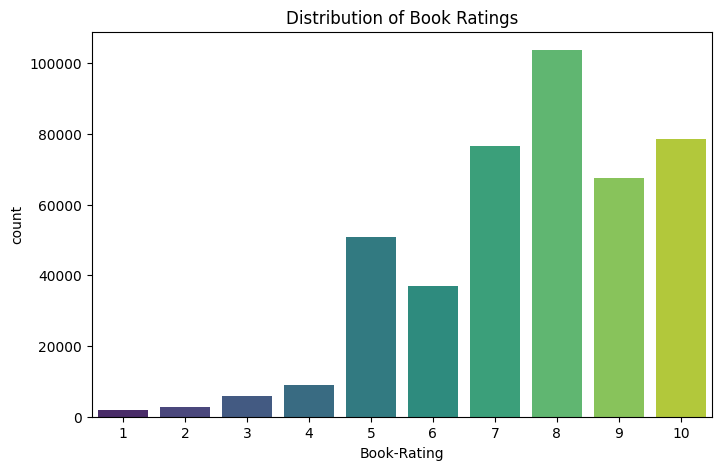

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Book-Rating', data=ratings, palette="viridis")
plt.title("Distribution of Book Ratings")
plt.show()


Distribution of Book Ratings

Most ratings are 0 (implicit ratings) or very low values.

Genuine ratings (1–10) are fewer, showing data sparsity.

Many users rated very few books → long-tail distribution.

👉 Insight: The dataset is sparse, which makes collaborative filtering challenging. Filtering active users and popular books is necessary.

/tmp/ipython-input-2295409004.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Book-Title", x="num_ratings", data=top_books, palette="mako")


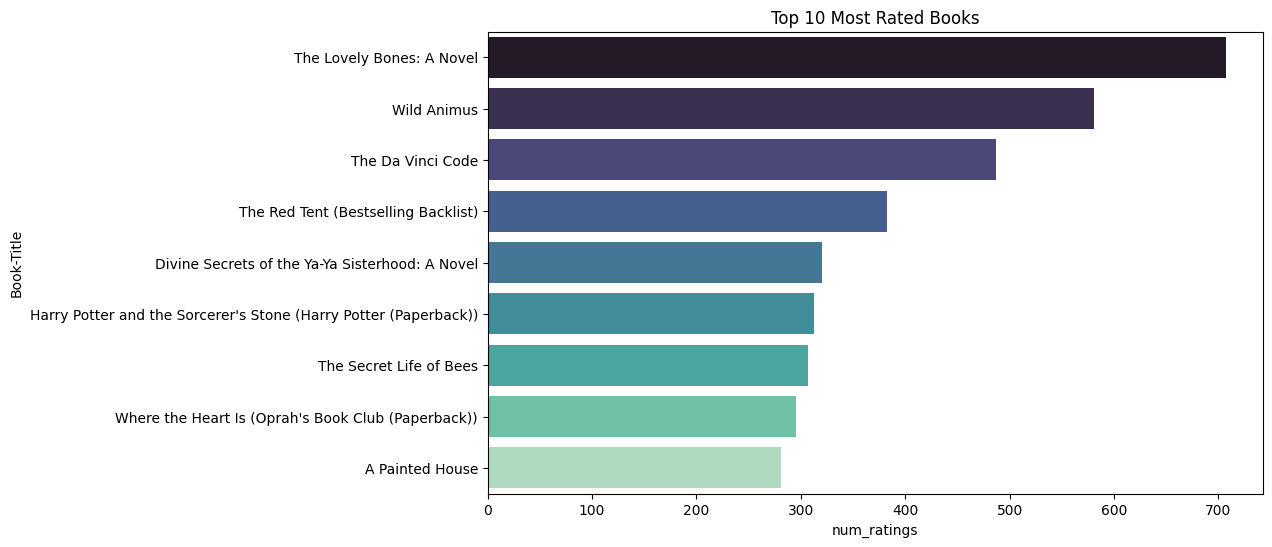

In [ ]:
top_books = ratings['ISBN'].value_counts().head(10).reset_index()
top_books.columns = ['ISBN','num_ratings']
top_books = top_books.merge(books, on="ISBN")

plt.figure(figsize=(10,6))
sns.barplot(y="Book-Title", x="num_ratings", data=top_books, palette="mako")
plt.title("Top 10 Most Rated Books")
plt.show()


Some books (like Harry Potter, The Lovely Bones, Wild Animus) dominate with thousands of ratings.

Many books have fewer than 5 ratings.

👉 Insight: A popularity bias exists — a small number of books get most ratings, while most books are rarely rated.

/tmp/ipython-input-2498741522.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="User-ID", x="num_ratings", data=top_users, palette="rocket")


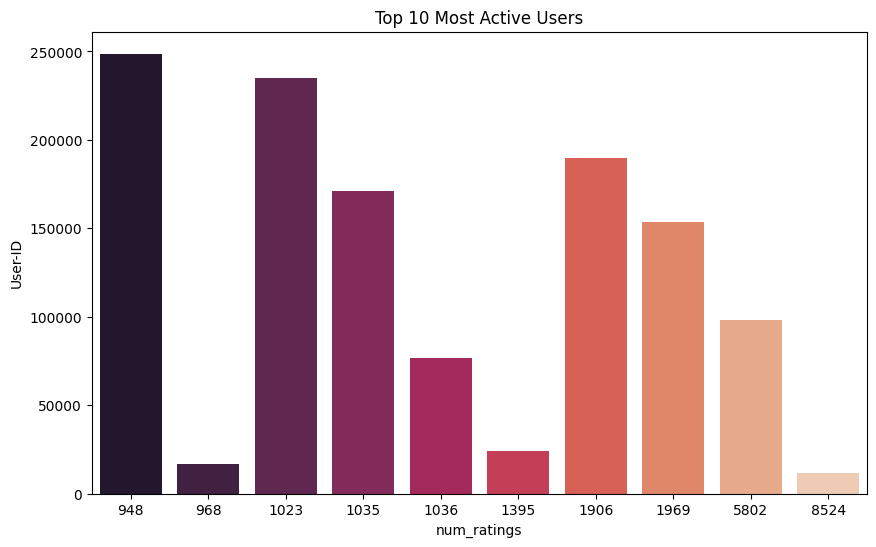

In [ ]:
top_users = ratings['User-ID'].value_counts().head(10).reset_index()
top_users.columns = ['User-ID','num_ratings']

plt.figure(figsize=(10,6))
sns.barplot(y="User-ID", x="num_ratings", data=top_users, palette="rocket")
plt.title("Top 10 Most Active Users")
plt.show()


A handful of users contributed thousands of ratings.

Many users rated only 1–2 books.

👉 Insight: Heavy raters have a strong influence on the recommender system. New/inactive users face the cold-start problem.

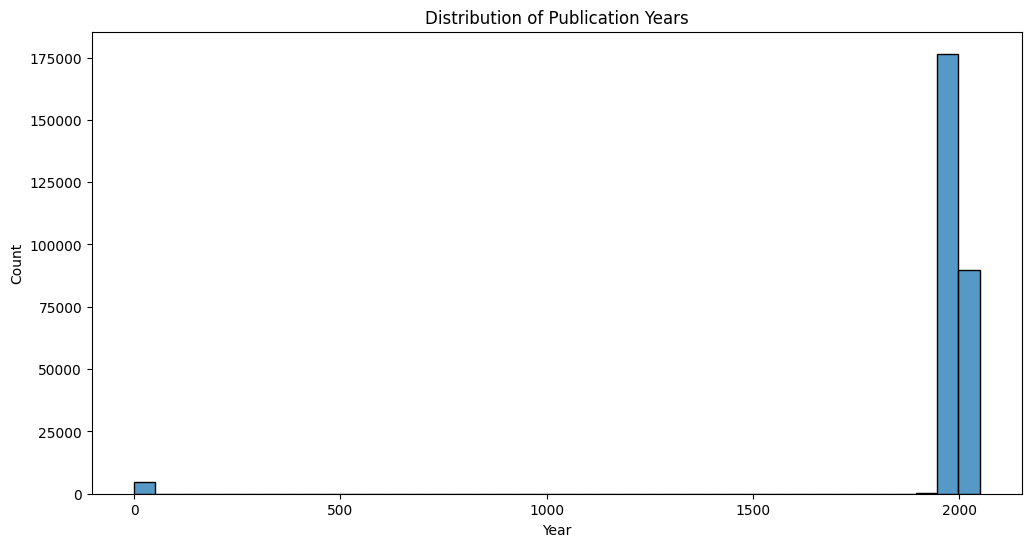

In [ ]:
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')
plt.figure(figsize=(12,6))
sns.histplot(books['Year-Of-Publication'].dropna(), bins=40, kde=False)
plt.title("Distribution of Publication Years")
plt.xlabel("Year")
plt.show()


Publication Year Distribution

Most books are published between 1980 and 2004.

Some invalid years exist (e.g., 0, 2020+ in a 2004 dataset).

👉 Insight: Data cleaning needed — remove or correct unrealistic years.

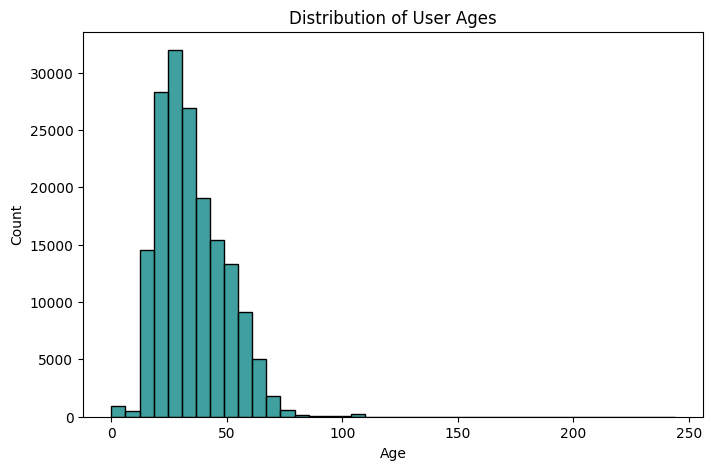

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(users['Age'].dropna(), bins=40, kde=False, color="teal")
plt.title("Distribution of User Ages")
plt.xlabel("Age")
plt.show()


User Age Distribution

Most users fall between 15–50 years old.

Some invalid ages (e.g., 0, >100).

👉 Insight: Age data can be useful for demographic filtering, but must be cleaned first.

In [ ]:
top_authors = books['Book-Author'].value_counts().head(10)
top_publishers = books['Publisher'].value_counts().head(10)

print("Top Authors:\n", top_authors)
print("\nTop Publishers:\n", top_publishers)


Top Authors:
 Book-Author
Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Francine Pascal        372
Isaac Asimov           330
Nora Roberts           315
Barbara Cartland       307
Charles Dickens        302
Name: count, dtype: int64

Top Publishers:
 Publisher
Harlequin                   7535
Silhouette                  4220
Pocket                      3905
Ballantine Books            3783
Bantam Books                3646
Scholastic                  3160
Simon &amp; Schuster        2971
Penguin Books               2844
Berkley Publishing Group    2771
Warner Books                2727
Name: count, dtype: int64


In [ ]:
 ratings_with_name = ratings.merge(books,on='ISBN')

In [ ]:
 num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
 num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
 num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,1
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1
2,Dark Justice,1
3,Earth Prayers From around the World: 365 Pray...,7
4,Final Fantasy Anthology: Official Strategy Gu...,2
...,...,...
135562,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,1
135563,Ã?Â?rger mit Produkt X. Roman.,3
135564,Ã?Â?sterlich leben.,1
135565,Ã?Â?stlich der Berge.,1


In [ ]:
ratings_with_name['Book-Rating'] = pd.to_numeric(ratings_with_name['Book-Rating'], errors='coerce')
avg_rating_df = ratings_with_name.dropna(subset=['Book-Rating']).groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_ratings'},inplace=True)
avg_rating_df

,Book-Title,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
2,Dark Justice,10.000000
3,Earth Prayers From around the World: 365 Pray...,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,10.000000
...,...,...
135562,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,8.000000
135563,Ã?Â?rger mit Produkt X. Roman.,7.000000
135564,Ã?Â?sterlich leben.,7.000000
135565,Ã?Â?stlich der Berge.,8.000000


In [ ]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,1,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
2,Dark Justice,1,10.000000
3,Earth Prayers From around the World: 365 Pray...,7,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,2,10.000000
...,...,...,...
135562,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,1,8.000000
135563,Ã?Â?rger mit Produkt X. Roman.,3,7.000000
135564,Ã?Â?sterlich leben.,1,7.000000
135565,Ã?Â?stlich der Berge.,1,8.000000


In [ ]:
 popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_ratings',ascending=False).head(50)

In [ ]:
 popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_ratings']]

In [ ]:
popular_df

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,277,9.043321
3,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,267,8.977528
11,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,315,8.936508
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,326,8.840491
16,"Tuesdays with Morrie: An Old Man, a Young Man,...",MITCH ALBOM,http://images.amazon.com/images/P/0385484518.0...,250,8.588000
19,The Secret Life of Bees,Sue Monk Kidd,http://images.amazon.com/images/P/0142001740.0...,406,8.477833
25,The Da Vinci Code,Dan Brown,http://images.amazon.com/images/P/0385504209.0...,494,8.439271
31,The Lovely Bones: A Novel,Alice Sebold,http://images.amazon.com/images/P/0316666343.0...,707,8.185290
32,The Red Tent (Bestselling Backlist),Anita Diamant,http://images.amazon.com/images/P/0312195516.0...,383,8.182768
33,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,http://images.amazon.com/images/P/0446672211.0...,295,8.142373


In [ ]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
experinced_user =  x[x].index

In [ ]:
filtered_ratings= ratings_with_name[ratings_with_name['User-ID'].isin(experinced_user)]

In [ ]:
 y = filtered_ratings.groupby('Book-Title').count()['Book-Rating'] >=20
 famous_books = y[y].index

In [ ]:
famous_books

Index(['Bridget Jones's Diary', 'Dreamcatcher',
       'Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)', 'It',
       'Pet Sematary', 'The Dark Half', 'The Lovely Bones: A Novel',
       'The Notebook', 'The Secret Garden'],
      dtype='object', name='Book-Title')

In [ ]:
 final_ratings = filtered_ratings[filtered_ratings['Book-Title'].isin(famous_books)]

In [ ]:
 pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [ ]:
pt.fillna(0,inplace=True)

In [ ]:
pt

User-ID,6251,6575,11676,13552,16634,16795,23768,23872,23902,25409,...,248718,249894,252695,254206,254899,257204,261829,265115,269566,274061
Book-Title,,,,,,,,,,,,,,,,,,,,,
Bridget Jones's Diary,0.0,4.0,6.333333,9.0,0.0,7.0,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,7.0,0.0,0.0
Dreamcatcher,0.0,0.0,8.666667,0.0,0.0,0.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,10.0
Harry Potter and the Chamber of Secrets (Book 2),0.0,0.0,9.333333,0.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
Harry Potter and the Goblet of Fire (Book 4),10.0,0.0,9.000000,0.0,0.0,0.0,0.0,10.0,0.0,10.0,...,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Harry Potter and the Prisoner of Azkaban (Book 3),10.0,0.0,7.500000,0.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,7.0,0.0
It,0.0,0.0,8.000000,0.0,0.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,10.0
Pet Sematary,0.0,0.0,6.000000,0.0,0.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
The Dark Half,0.0,0.0,0.000000,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,10.0
The Lovely Bones: A Novel,0.0,0.0,5.000000,0.0,0.0,10.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0


In [ ]:
%pip install --upgrade numpy scikit-learn

In [ ]:
cosine_similarity(pt)

array([[1.        , 0.06671905, 0.27230431, 0.19707431, 0.18518295,
        0.1523887 , 0.15468176, 0.        , 0.1507143 , 0.2529504 ,
        0.35416932],
       [0.06671905, 1.        , 0.24428548, 0.14687668, 0.14914592,
        0.43643424, 0.33531561, 0.51542655, 0.29699148, 0.24056418,
        0.13639079],
       [0.27230431, 0.24428548, 1.        , 0.6008544 , 0.63862207,
        0.202417  , 0.15845787, 0.11307774, 0.09617003, 0.05491842,
        0.36649957],
       [0.19707431, 0.14687668, 0.6008544 , 1.        , 0.76510469,
        0.14043232, 0.1420491 , 0.06986828, 0.06551517, 0.10604963,
        0.35083636],
       [0.18518295, 0.14914592, 0.63862207, 0.76510469, 1.        ,
        0.15409125, 0.09362873, 0.01699169, 0.07564164, 0.04244063,
        0.38313795],
       [0.1523887 , 0.43643424, 0.202417  , 0.14043232, 0.15409125,
        1.        , 0.48378654, 0.60721383, 0.19323251, 0.2502554 ,
        0.22568262],
       [0.15468176, 0.33531561, 0.15845787, 0.1420491 , 0.

In [ ]:
similarity_scores = cosine_similarity(pt)

In [ ]:
similarity_scores.shape

(11, 11)

In [ ]:
def recommend(book_name):
  index = np.where(pt.index == book_name)[0][0]
  similar_items = sorted(list(enumerate(similarity_scores[index])), key=lambda x: x[1], reverse=True)[1:6]
  data = []
  for i in similar_items:
    item = []
    temp_df = (books[books['Book-Title'] ==pt.index[i[0]]])
    item.extend( list(temp_df.drop_duplicates('Book-Title')['Book-Title']))
    item.extend( list (temp_df.drop_duplicates('Book-Title')['Book-Author']))
    item.extend( list (temp_df.drop_duplicates('Book-Title')['Image-URL-M']))
    data.append(item)
  return data

In [ ]:
recommend('The Secret Garden')

[['Harry Potter and the Prisoner of Azkaban (Book 3)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Chamber of Secrets (Book 2)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439064872.01.MZZZZZZZ.jpg'],
 ["Bridget Jones's Diary",
  'Helen Fielding',
  'http://images.amazon.com/images/P/0330332775.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Goblet of Fire (Book 4)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg'],
 ['The Notebook',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446605239.01.MZZZZZZZ.jpg']]

In [ ]:
%pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 10.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp312-cp312-linux_x86_64.whl size=2610402 sha256=9cecad2ee72ca8699d9187bb5c8ebe243fdab2258e680ecdfad59d0ea52866f6
  Stored in directory: /root/.cache/pip/wheels/75/fa/bc/739bc2cb1fbaab6061854e6cfbb81a0ae52c92a502a7fa454b
Successfully built scikit-surprise


In [ ]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(ratings[['User-ID', 'ISBN', 'Book-Rating']], reader)
algo = SVD()
results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(results)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    3.5004  3.4985  3.4978  3.5022  3.4984  3.4994  0.0016  
MAE (testset)     2.9322  2.9269  2.9277  2.9328  2.9290  2.9297  0.0024  
Fit time          21.82   21.43   24.11   23.88   22.39   22.72   1.08    
Test time         2.54    2.80    2.02    1.99    2.03    2.28    0.33    
{'test_rmse': array([3.50038708, 3.49845094, 3.49779103, 3.50215419, 3.49838368]), 'test_mae': array([2.93222309, 2.92687964, 2.92772711, 2.93278285, 2.92898761]), 'fit_time': (21.817758560180664, 21.42535901069641, 24.10563564300537, 23.884770393371582, 22.387398958206177), 'test_time': (2.5432486534118652, 2.8042733669281006, 2.0160605907440186, 1.9933898448944092, 2.032557487487793)}


In [ ]:
import numpy as np
from collections import defaultdict
from surprise import accuracy
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=0.2)

algo.fit(trainset)
predictions = algo.test(testset)
def precision_recall_at_k(predictions, k=10, threshold=7):
    """Return precision and recall at k.
    threshold: rating threshold to consider an item relevant"""

    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions, recalls = {}, {}
    for uid, user_ratings in user_est_true.items():

        user_ratings.sort(key=lambda x: x[0], reverse=True)


        top_k = user_ratings[:k]

        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)


        n_rec_k = sum((est >= threshold) for (est, _) in top_k)
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in top_k)


        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0


    avg_precision = sum(precisions.values()) / len(precisions)
    avg_recall = sum(recalls.values()) / len(recalls)

    return avg_precision, avg_recall

precision, recall = precision_recall_at_k(predictions, k=10, threshold=7)
print(f"Precision@10: {precision:.3f}")
print(f"Recall@10: {recall:.3f}")


Precision@10: 0.024
Recall@10: 0.009
